## Contexte

Vous êtes data scientist/data analyst dans une banque et votre entreprise souhaite **analyser l'efficacité des campagnes de marketing direct basées sur les appels téléphoniques**. 

L'objectif est de **déterminer si ces campagnes influencent positivement la souscription des clients à des dépôts à terme**. 

Pour cela, vous disposez de quatre ensembles de données détaillant les interactions avec les clients sur une période allant de **mai 2008 à novembre 2010**.



## Objectif 

Votre mission consiste à effectuer une analyse exploratoire des données pour identifier les tendances, les comportements des clients, et d'autres insights pertinents qui peuvent aider la banque à optimiser ses futures campagnes de marketing.



## Jeu de Données

Vous disposez du jeu de données `donnee_marketing_banque.csv`, qui comprend **41 188 exemples avec 20 variables**, couvrant la période de mai 2008 à novembre 2010. Ces données incluent des informations sur les appels effectués, les caractéristiques des clients, et la réponse finale du client (souscription ou non à un dépôt à terme).

Le jeu de données peut être téléchargé à partir du [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

- `age`: Âge du client.
- `job`: Type de métier du client (ex. "manager", "blue-collar", "retired").
- `marital`: État civil du client (ex. "married", "single", "divorced").
- `education`: Niveau d'études du client (ex. "secondary", "primary", "tertiary").
- `default`: Présence ou absence de défaut de paiement de crédit (ex. "yes", "no").
- `balance`: Solde annuel moyen sur le compte du client.
- `housing`: Présence ou absence de prêt immobilier (ex. "yes", "no").
- `loan`: Présence ou absence de prêt personnel (ex. "yes", "no").
- `contact`: Moyen de communication avec le client (ex. "telephone", "cellular", "unknown").
- `day`: Jour du mois de la dernière prise de contact.
- `month`: Mois de l'année de la dernière prise de contact.
- `duration`: Durée de la dernière communication, en secondes.
- `campaign`: Nombre de contacts effectués pendant cette campagne pour ce client.
- `pdays`: Nombre de jours écoulés depuis le dernier contact du client lors d'une campagne précédente (999 indique que le client n'a pas été contacté précédemment).
- `previous`: Nombre de contacts réalisés avant cette campagne pour ce client.
- `poutcome`: Résultat de la campagne marketing précédente (ex. "failure", "nonexistent", "success").
- `y`: Le client a-t-il souscrit un dépôt à terme ? (variable cible, ex. "yes", "no").


# Importation et nettoyage des données

In [4]:
# Importation du package pandas
import pandas as pd

In [6]:
df = pd.read_excel("donnees_marketing_banque.xlsx")
df

id  age           job   marital  education default  balance  \
0          id1   58    management   married   tertiary      no   2143.0   
1          id2   44    technician    single  secondary      no     29.0   
2          id3   33  entrepreneur   married  secondary      no      2.0   
3          id4   47   blue-collar   married    unknown      no   1506.0   
4          id5   33       unknown    single    unknown      no      1.0   
...        ...  ...           ...       ...        ...     ...      ...   
45206  id45207   51    technician   married   tertiary      no    825.0   
45207  id45208   71       retired  divorced    primary      no   1729.0   
45208  id45209   72       retired   married  secondary      no   5715.0   
45209  id45210   57   blue-collar   married  secondary      no    668.0   
45210  id45211   37  entrepreneur   married  secondary      no   2971.0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no    unknown    5   may       261         1     -1         0   
1         yes   no    unknown    5   may       151         1     -1         0   
2         yes  yes    unknown    5   may        76         1     -1         0   
3         yes   no    unknown    5   may        92         1     -1         0   
4          no   no    unknown    5   may       198         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
45206      no   no   cellular   17   nov       977         3     -1         0   
45207      no   no   cellular   17   nov       456         2     -1         0   
45208      no   no   cellular   17   nov      1127         5    184         3   
45209      no   no  telephone   17   nov       508         4     -1         0   
45210      no   no   cellular   17   nov       361         2    188        11   

      poutcome    y  
0      unknown   no  
1      unknown   no  
2      unknown   no  
3      unknown   no  
4      unknown   no  
...        ...  ...  
45206  unknown  yes  
45207  unknown  yes  
45208  success  yes  
45209  unknown   no  
45210    other   no  

[45211 rows x 18 columns]

In [8]:
df.shape

(45211, 18)

In [10]:
# La nature des variables de la base de données
df.dtypes

id            object
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [12]:
# Description rapide de la base de données
df.describe()


age        balance           day      duration      campaign  \
count  45211.000000   45206.000000  45211.000000  45211.000000  45211.000000   
mean      40.931477    1362.403707     15.806419    258.163080      2.763841   
std       10.623372    3044.906741      8.322476    257.527812      3.098021   
min       10.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [14]:
# Ajout des variables qualitatives 
# Description rapide de la base de données
df.describe(include="all")

id           age          job  marital  education default  \
count   45211  45211.000000        45211    45211      45211   45211   
unique  45211           NaN           12        3          4       2   
top       id1           NaN  blue-collar  married  secondary      no   
freq        1           NaN         9732    27214      23202   44396   
mean      NaN     40.931477          NaN      NaN        NaN     NaN   
std       NaN     10.623372          NaN      NaN        NaN     NaN   
min       NaN     10.000000          NaN      NaN        NaN     NaN   
25%       NaN     33.000000          NaN      NaN        NaN     NaN   
50%       NaN     39.000000          NaN      NaN        NaN     NaN   
75%       NaN     48.000000          NaN      NaN        NaN     NaN   
max       NaN     95.000000          NaN      NaN        NaN     NaN   

              balance housing   loan   contact           day  month  \
count    45206.000000   45211  45211     45211  45211.000000  45211   
unique            NaN       2      2         3           NaN     12   
top               NaN     yes     no  cellular           NaN    may   
freq              NaN   25130  37967     29285           NaN  13766   
mean      1362.403707     NaN    NaN       NaN     15.806419    NaN   
std       3044.906741     NaN    NaN       NaN      8.322476    NaN   
min      -8019.000000     NaN    NaN       NaN      1.000000    NaN   
25%         72.000000     NaN    NaN       NaN      8.000000    NaN   
50%        448.000000     NaN    NaN       NaN     16.000000    NaN   
75%       1428.000000     NaN    NaN       NaN     21.000000    NaN   
max     102127.000000     NaN    NaN       NaN     31.000000    NaN   

            duration      campaign         pdays      previous poutcome      y  
count   45211.000000  45211.000000  45211.000000  45211.000000    45211  45211  
unique           NaN           NaN           NaN           NaN        4      2  
top              NaN           NaN           NaN           NaN  unknown     no  
freq             NaN           NaN           NaN           NaN    36959  39922  
mean      258.163080      2.763841     40.197828      0.580323      NaN    NaN  
std       257.527812      3.098021    100.128746      2.303441      NaN    NaN  
min         0.000000      1.000000     -1.000000      0.000000      NaN    NaN  
25%       103.000000      1.000000     -1.000000      0.000000      NaN    NaN  
50%       180.000000      2.000000     -1.000000      0.000000      NaN    NaN  
75%       319.000000      3.000000     -1.000000      0.000000      NaN    NaN  
max      4918.000000     63.000000    871.000000    275.000000      NaN    NaN

In [15]:
df.isnull().mean()

id           0.000000
age          0.000000
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000111
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
y            0.000000
dtype: float64

In [17]:
# Conserver uniquement les clients majeurs
df_majeur =  df[df["age"]>=18]
df_majeur.describe()

age        balance           day      duration      campaign  \
count  45203.000000   45198.000000  45203.000000  45203.000000  45203.000000   
mean      40.936133    1362.631997     15.808331    258.168816      2.764153   
std       10.618494    3045.126997      8.321971    257.548471      3.098206   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     449.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45203.000000  45203.000000  
mean      40.205119      0.580426  
std      100.136106      2.303632  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [15]:
df.columns

Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
df.dtypes

id            object
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

# Visualisation des Variables Quantitatives Univariées



Lors de l'analyse de variables quantitatives univariées, il est essentiel de choisir le bon type de graphique pour une interprétation correcte des données. Voici quelques types de graphiques fréquemment utilisés :

## Histogramme

- **Usage** : Idéal pour montrer la distribution d'une variable quantitative.
- **Description** : L'histogramme permet de visualiser la fréquence de chaque intervalle de valeurs, facilitant la compréhension de la distribution des données.

## Diagramme en Boîte (Boxplot)

- **Usage** : Utilisé pour visualiser la répartition des données en termes de quartiles.
- **Description** : Le diagramme en boîte illustre la médiane, les quartiles, et les valeurs aberrantes, et est utile pour identifier les anomalies et comparer les distributions.

## Courbe de Densité

- **Usage** : Parfait pour visualiser la distribution d'une variable continue.
- **Description** : La courbe de densité est une version lissée de l'histogramme, offrant une visualisation claire de la distribution des données.

Ces graphiques offrent des moyens efficaces de comprendre et d'analyser les caractéristiques essentielles des variables quantitatives univariées.


Pour en savoir plus sur la visualisation avec python et matplotlib cliquez sur le lien suivant: [https://matplotlib.org/stable/plot_types/index.html](https://matplotlib.org/stable/plot_types/index.html)

## Histogramme

In [24]:
# importation de matplotlib
import matplotlib.pyplot as plt


(array([ 1335., 11746., 12922.,  8015.,  7065.,  3310.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

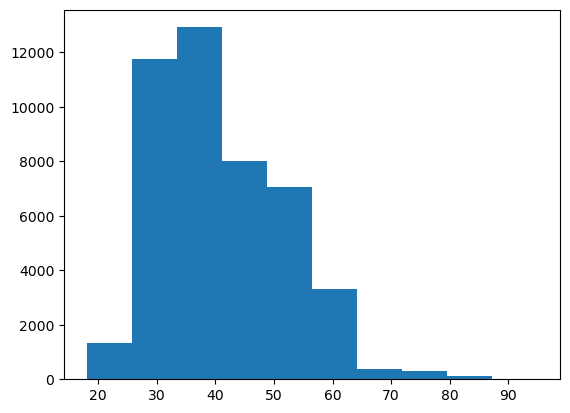

In [25]:
# histogramme de la variable age
plt.hist(df_majeur["age"])



Text(0, 0.5, ' Effectif')

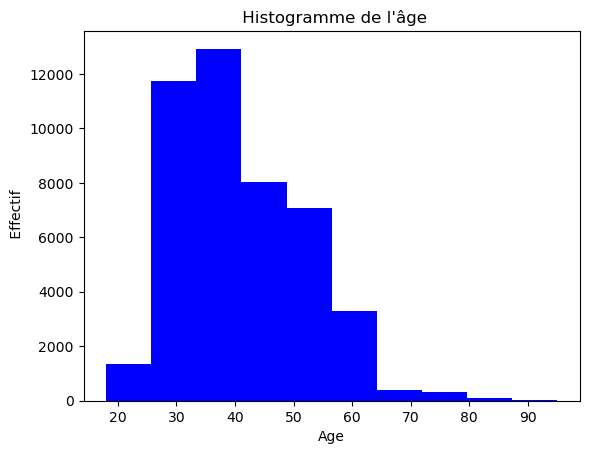

In [26]:
# personaliser: couleur, titre des axes et du graphique, bins etc
plt.hist(df_majeur["age"], color="blue")
plt.title(" Histogramme de l'âge")
plt.xlabel("Age")
plt.ylabel(" Effectif")


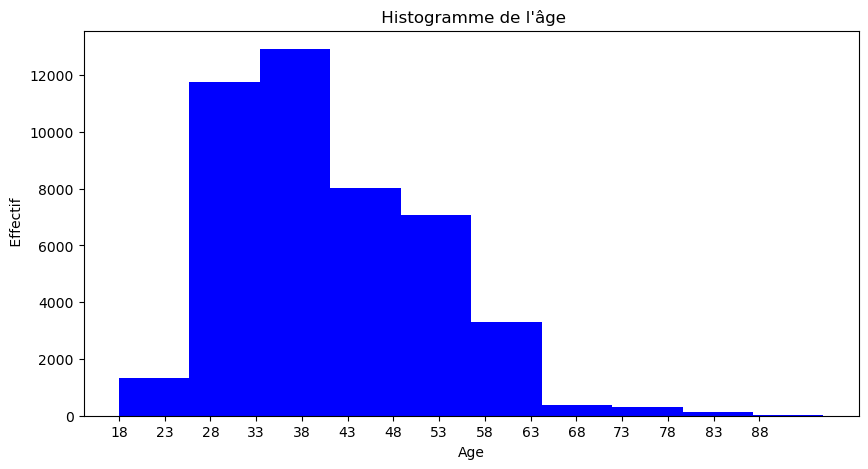

In [28]:
# changer les marque de l'axe des x (xticks)
plt.figure(figsize=(10,5))
plt.hist(df_majeur["age"], color="blue")
plt.title(" Histogramme de l'âge")
plt.xlabel("Age")
plt.ylabel(" Effectif")
plt.xticks(range(18,90, 5))
plt.show() # Afficher le graphique


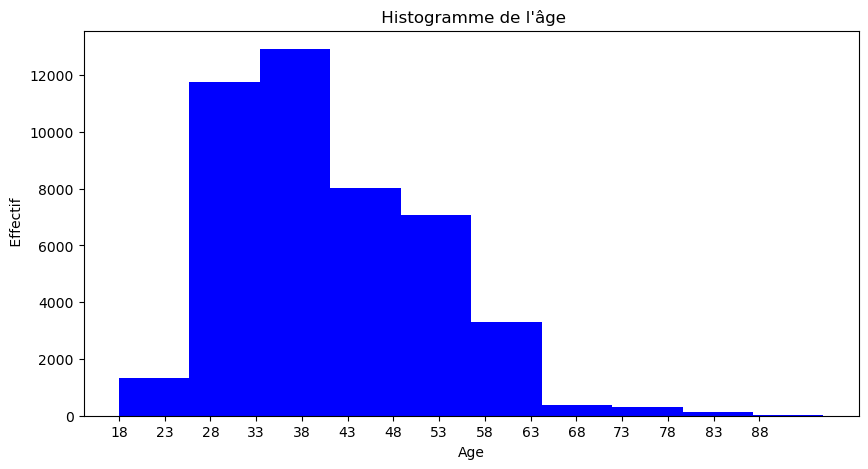

In [29]:
# enregistrer le graphique
plt.figure(figsize=(10,5))
plt.hist(df_majeur["age"], color="blue")
plt.title(" Histogramme de l'âge")
plt.xlabel("Age")
plt.ylabel(" Effectif")
plt.xticks(range(18,90, 5))
plt.savefig("graphique.png")
plt.show() # Afficher le graphique

## Boxplot de la variable quantitative

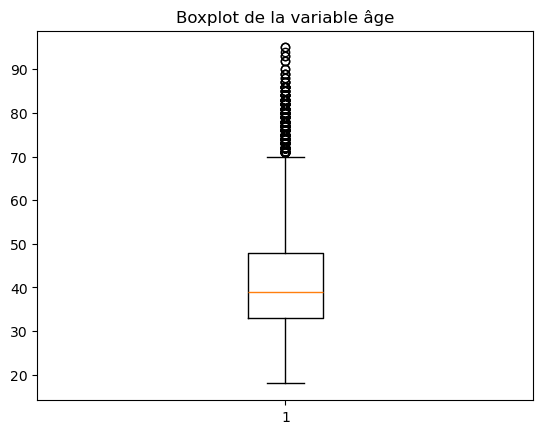

In [31]:
# Boxplot de la variable age
plt.boxplot(df_majeur["age"])
plt.title("Boxplot de la variable âge")
plt.show()

# Graphique de la variable quantitative avec seaborn

Découvrez seaborn en cliquant sur le lien suivant [https://seaborn.pydata.org/index.html](https://seaborn.pydata.org/index.html)

In [35]:
# importation de seaborn
import seaborn as sns


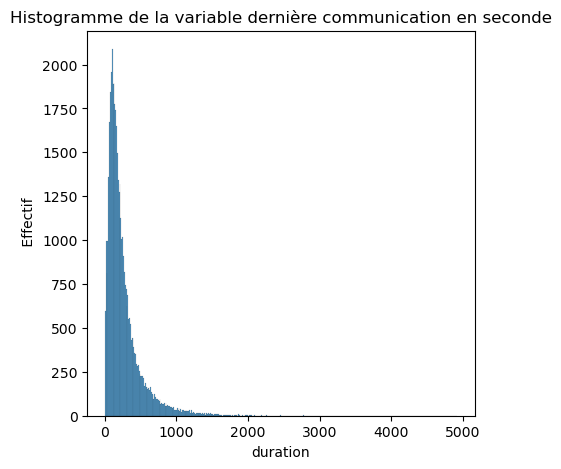

In [36]:
# hsistogramme durée de la dernière communication en seconde
plt.figure(figsize=(5,5))
sns.histplot(df["duration"])
plt.title("Histogramme de la variable dernière communication en seconde")
plt.xlabel("duration")
plt.ylabel(" Effectif")
plt.show()

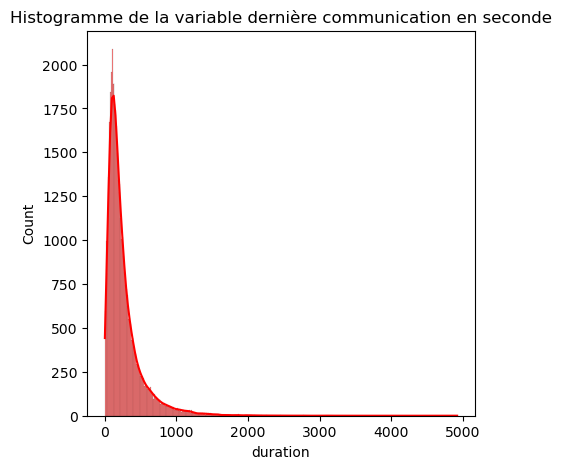

In [37]:
# Ajout de la courbe de densité (kde=True)
plt.figure(figsize=(5,5))
sns.histplot(df["duration"], kde=True, color="red")
plt.title("Histogramme de la variable dernière communication en seconde")
plt.show()

In [39]:
# Boxplot avec seaborn


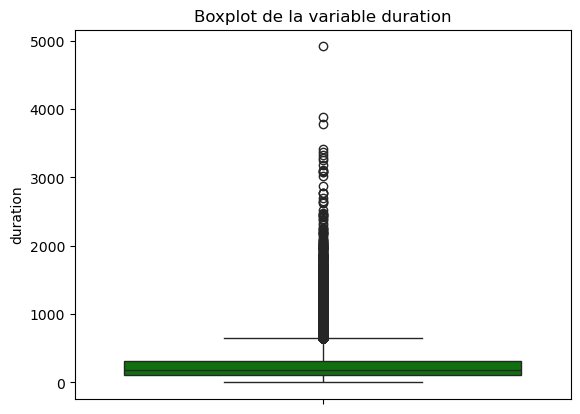

In [41]:
sns.boxplot(df_majeur["duration"], color="green")
plt.title("Boxplot de la variable duration")
plt.show()

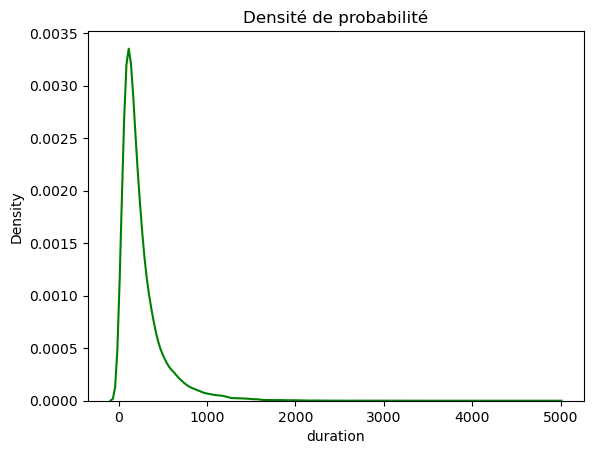

In [43]:
# Courbe de densité
sns.kdeplot(df_majeur["duration"], color="green")
plt.title("Densité de probabilité")
plt.show()

# Visualisation univariée des variables qualitatives

Lors de l'analyse de variables qualitatives univariées, le choix du bon type de graphique revêt une importance cruciale pour une interprétation précise des données. Voici quelques types de graphiques couramment utilisés pour visualiser des variables qualitatives :

## Diagramme en Barres

- **Usage** : Idéal pour représenter la fréquence ou la distribution de catégories distinctes.
- **Description** : Le diagramme en barres utilise des barres verticales ou horizontales pour représenter la fréquence ou le pourcentage de chaque catégorie, ce qui permet de comparer visuellement les catégories entre elles.

## Diagramme en Secteurs (Camembert)

- **Usage** : Convient pour montrer la répartition des catégories en pourcentages.
- **Description** : Le diagramme en secteurs divise un cercle en sections proportionnelles à la fréquence de chaque catégorie, ce qui facilite la comparaison des proportions.

Ces graphiques offrent des moyens efficaces de comprendre et d'analyser les caractéristiques essentielles des variables qualitatives univariées. Ils permettent de mettre en évidence la répartition des catégories et de visualiser les différences entre elles, ce qui facilite l'interprétation des données qualitatives.


## Diagramme en barre avec matplotlib

In [50]:
# diagramme en barre en terme de nombre

# Détermination des effectifs par modalité
effectif = df_majeur["education"].value_counts().reset_index()
type(effectif)
print(effectif)

   education  count
0  secondary  23199
1   tertiary  13298
2    primary   6849
3    unknown   1857


In [51]:
# Graphique
couleur = ["red", "blue", "green", "purple"]
plt.bar(effectif["education"], effectif["count"], color =coleur)
# Ajouter les valeurs sur chaque barre
for i, freq in enumerate(effectif["count"]):
    plt.text(i, freq, str(freq), ha='center', va='bottom')
    
plt.xlabel("Niveau d'éducation")
plt.ylabel("Effectif")
plt.title("Répartition par niveau d'éducation ")

NameError: name 'coleur' is not defined

In [ ]:
effectif["proportion"] = round(100*effectif["count"]/effectif["count"].sum())

# Graphique
coleur = ["red", "blue", "green", "purple"]
plt.bar(effectif["education"], effectif["proportion"], color =couleur)
# Ajouter les valeurs sur chaque barre
for i, freq in enumerate(effectif["proportion"]):
    plt.text(i, freq, str(freq), ha='center', va='bottom')
    
plt.xlabel("Niveau d'éducation")
plt.ylabel("Effectif")
plt.title("Répartition par niveau d'éducation ")

## Pie Char avec matplotlib

Pour comprendre les piechar [https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

In [ ]:
# Réaliser le pie chart
plt.pie(effectif["count"], labels=effectif["education"], autopct="%1.1f%%", colors=couleur)
plt.show()

## Barplot avec seaborn

In [ ]:
sns.barplot(x="education", y="count", data=effectif)
# Ajouter les valeurs sur chaque barre
for i, freq in enumerate(effectif["proportion"]):
    plt.text(i, freq, str(freq), ha='center', va='bottom')
    

# Analyse des variables qualitative vs quantitative

Pour visualiser des relations entre une variable quantitative et une variable qualitative, vous pouvez utiliser plusieurs types de graphiques en fonction de la nature de vos données. Voici trois types de graphiques bivariés adaptés à ces types de variables :

## Boxplot et Violonplot

- **Usage** : Utile pour visualiser la distribution des valeurs quantitatives en fonction des catégories qualitatives.
- **Description** : Les boîtes (boxplots) et les violons (violin plots) présentent la distribution des valeurs quantitatives pour chaque catégorie qualitative. Les boîtes montrent les quartiles et les médianes, tandis que les violons montrent la densité de probabilité. Cela permet de comparer la distribution des valeurs entre les catégories qualitatives.
    
    
## Barplot avec Sous-groupes (Grouped Barplot)

- **Usage** : Idéal pour comparer des valeurs quantitatives entre différentes catégories qualitatives.
- **Description** : Un barplot avec sous-groupes affiche des barres pour chaque catégorie qualitative, et à l'intérieur de chaque barre, il y a des sous-groupes qui représentent les valeurs quantitatives. Cela permet de comparer visuellement les valeurs quantitatives entre les catégories qualitatives.

## Boxplot entre la variable y et l'age

In [ ]:
# expemple d'une variable
# Relation entre le fait de souscrire au dépot et la durée du prêt
sns.boxplot(x="y", y="duration", data=df_majeur)

In [ ]:
# Balance et y
# Relation entre le fait de souscrire au dépot et la durée du prêt
sns.boxplot(x="y", y="age", data=df_majeur)

In [ ]:
# Durée de la dernière communication, en secondes (duration). et y


<Axes: xlabel='y', ylabel='duration'>

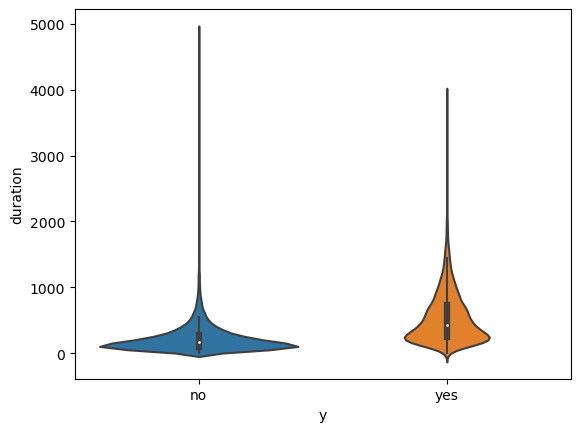

In [99]:
# Violin plot
# Relation entre le fait de souscrire au dépot et la durée du prêt
sns.violinplot(x="y", y="duration", data=df_majeur)



In [ ]:
## Barplot avec sous grouppe
# Créer un barplot avec sous-groupes


# Graphique bivariée entre deux variables qualitatives

Lors de l'analyse de relations entre deux variables qualitatives, il est important de choisir les bonnes méthodes de visualisation pour comprendre les tendances et les associations. Voici deux types de graphiques bivariés adaptés à ces types de variables :

## Tableau Croisé (Contingency Table)

- **Usage** : Idéal pour explorer les relations entre deux variables qualitatives en comptant les fréquences conjointes.
- **Description** : Le tableau croisé affiche le nombre d'occurrences pour chaque combinaison de catégories des deux variables qualitatives. Il permet de visualiser les associations et les tendances entre les deux variables.

## Diagramme en Barres (Bar Chart)

- **Usage** : Utile pour comparer les fréquences ou les proportions de différentes catégories d'une variable qualitative en fonction d'une autre.
- **Description** : Le diagramme en barres affiche des barres verticales ou horizontales pour chaque catégorie de la variable qualitative étudiée. Cela permet de comparer visuellement les fréquences ou les proportions des catégories par rapport à une autre variable qualitative.



In [100]:
# Tableau de contingence entre les deux

# Créer un tableau croisé
table_contingence = pd.crosstab(df_majeur["y"], df_majeur["education"])
table_contingence

education  primary  secondary  tertiary  unknown
y                                               
no            6258      20749     11302     1605
yes            591       2450      1996      252

<Axes: xlabel='y', ylabel='count'>

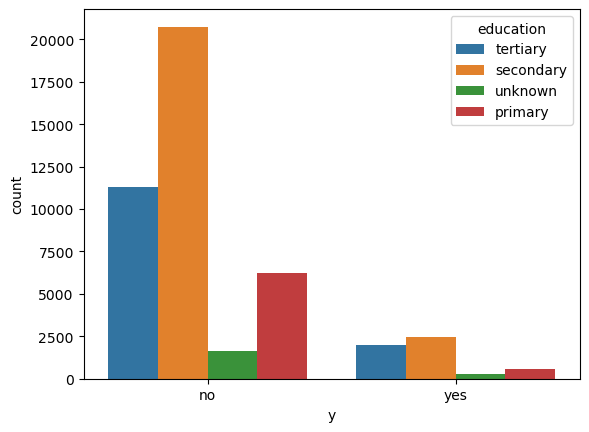

In [101]:
# faire le countplot
sns.countplot(x="y", hue="education", data=df_majeur)

In [102]:
# Proportion option normalize
prop_table = df_majeur.groupby("y")["education"].value_counts(normalize=True).reset_index(name="proportion")
prop_table
# Calculer les proportions pour chaque catégorie de 'y' et 'education' de manière à ce que la somme soit égale à 1


y  education  proportion
0   no  secondary    0.519843
1   no   tertiary    0.283159
2   no    primary    0.156787
3   no    unknown    0.040211
4  yes  secondary    0.463226
5  yes   tertiary    0.377387
6  yes    primary    0.111741
7  yes    unknown    0.047646

<Axes: xlabel='y', ylabel='proportion'>

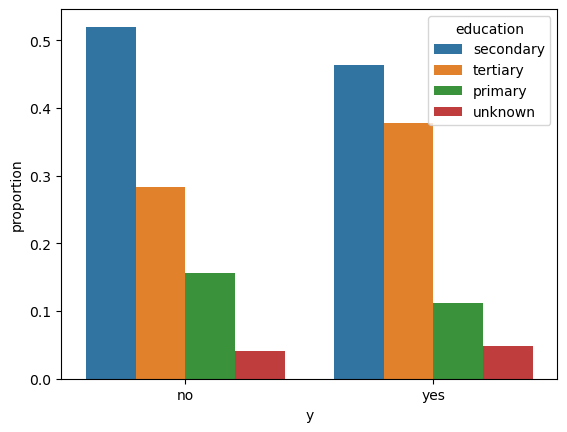

In [103]:

# Calculer les proportions pour chaque catégorie de 'y' et 'education' de manière à ce que la somme soit égale à 1
sns.barplot(x="y", y="proportion", hue="education", data=prop_table)

# Analyse bivariée entre les variables quantitatives



Lors de l'analyse des relations entre deux variables quantitatives, il est essentiel de choisir les outils de visualisation appropriés pour comprendre la corrélation et les tendances. Voici deux types de graphiques adaptés à ces types de relations :

### Scatterplot (Nuage de Points)

- **Usage** : Idéal pour visualiser la relation entre deux variables quantitatives continues.
- **Description** : Le scatterplot affiche les points de données individuels dans un espace bidimensionnel, où chaque axe représente l'une des variables quantitatives. Il permet de visualiser la répartition des points et d'identifier des tendances, des modèles ou des corrélations entre les deux variables. Une corrélation positive est indiquée lorsque les points se déplacent dans la même direction, tandis qu'une corrélation négative est indiquée lorsque les points se déplacent dans des directions opposées.

### Heatmap de Corrélation

- **Usage** : Utile pour quantifier et visualiser la corrélation entre plusieurs paires de variables quantitatives.
- **Description** : La heatmap de corrélation est un graphique matriciel qui attribue des couleurs aux coefficients de corrélation entre les paires de variables quantitatives. Elle permet de quantifier la force et la direction de la corrélation entre les variables. Les valeurs proches de 1 indiquent une corrélation positive forte, tandis que les valeurs proches de -1 indiquent une corrélation négative forte. Une valeur proche de 0 indique une faible corrélation.

Ces graphiques offrent des moyens puissants d'explorer et d'analyser les relations entre deux variables quantitatives. Le scatterplot permet une visualisation directe des données brutes, tandis que la heatmap de corrélation permet d'obtenir une vue d'ensemble de la corrélation entre plusieurs paires de variables.

N'hésitez pas à utiliser ces outils pour mieux comprendre les relations entre vos variables quantitatives et à les adapter en fonction de vos besoins d'analyse.


Text(0, 0.5, 'age')

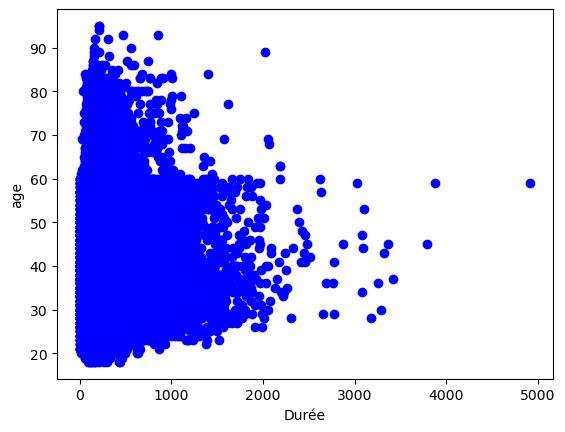

In [107]:
# Scatter plot avec matplotlib entre l'age et la duration

plt.scatter(df_majeur["duration"], df_majeur["age"], c="blue")
plt.xlabel("Durée")
plt.ylabel("age")

<Axes: xlabel='duration', ylabel='age'>

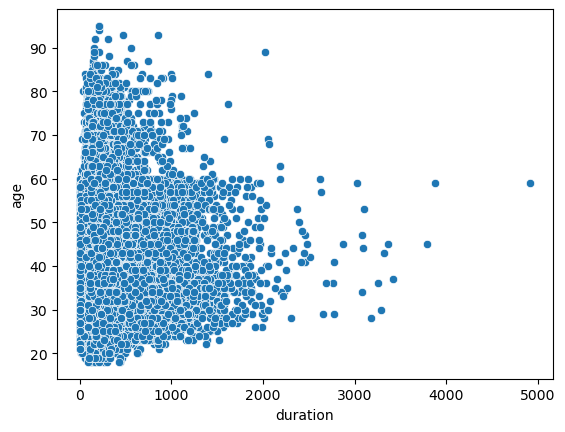

In [108]:
# sns
sns.scatterplot(x="duration", y="age", data=df_majeur)


In [111]:
# Heatmap de corrélation entre les variables quantitatives
var_quantitative = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
df_quanti = df_majeur[var_quantitative]
df_quanti

age  balance  day  duration  campaign  pdays  previous
0       58   2143.0    5       261         1     -1         0
1       44     29.0    5       151         1     -1         0
2       33      2.0    5        76         1     -1         0
3       47   1506.0    5        92         1     -1         0
4       33      1.0    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51    825.0   17       977         3     -1         0
45207   71   1729.0   17       456         2     -1         0
45208   72   5715.0   17      1127         5    184         3
45209   57    668.0   17       508         4     -1         0
45210   37   2971.0   17       361         2    188        11

[45203 rows x 7 columns]

In [113]:
matrice_correlation = df_quanti.corr()
matrice_correlation

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097827 -0.009113 -0.004639  0.004765 -0.023758  0.001290
balance   0.097827  1.000000  0.004350  0.021557 -0.014647  0.003387  0.016644
day      -0.009113  0.004350  1.000000 -0.030240  0.162388 -0.093154 -0.051776
duration -0.004639  0.021557 -0.030240  1.000000 -0.084585 -0.001574  0.001197
campaign  0.004765 -0.014647  0.162388 -0.084585  1.000000 -0.088673 -0.032882
pdays    -0.023758  0.003387 -0.093154 -0.001574 -0.088673  1.000000  0.454811
previous  0.001290  0.016644 -0.051776  0.001197 -0.032882  0.454811  1.000000

<Axes: xlabel='age', ylabel='age'>

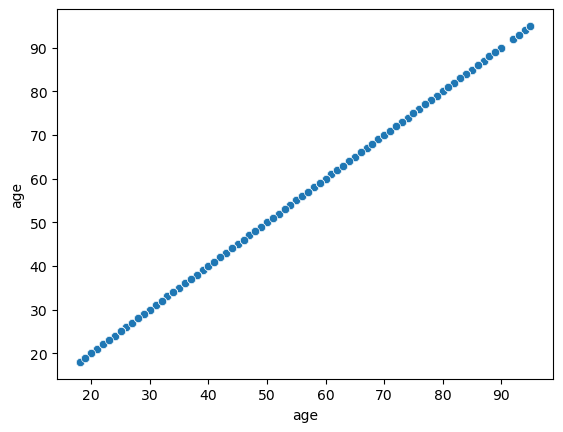

In [118]:
# sns
sns.scatterplot(x="age", y="age", data=df_majeur)

<Axes: >

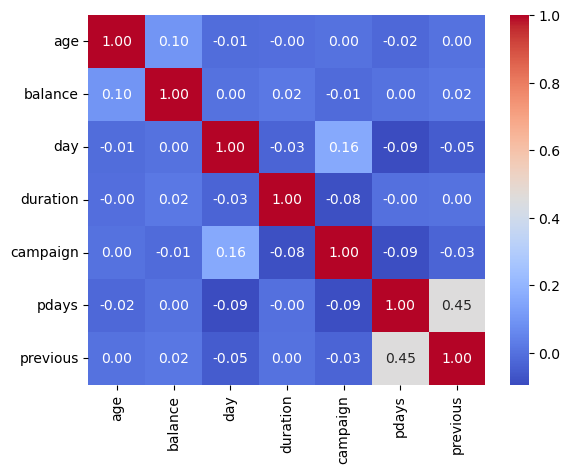

In [114]:
sns.heatmap(matrice_correlation, annot=True, cmap="coolwarm", fmt=".2f")

In [109]:
# Matrice de corrélation 
df_majeur.dtypes

id            object
age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [ ]:

# Créer une heatmap de corrélation avec Seaborn


# Pairplot pour les liaisons rapides

/Users/natachanjongwayepnga/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


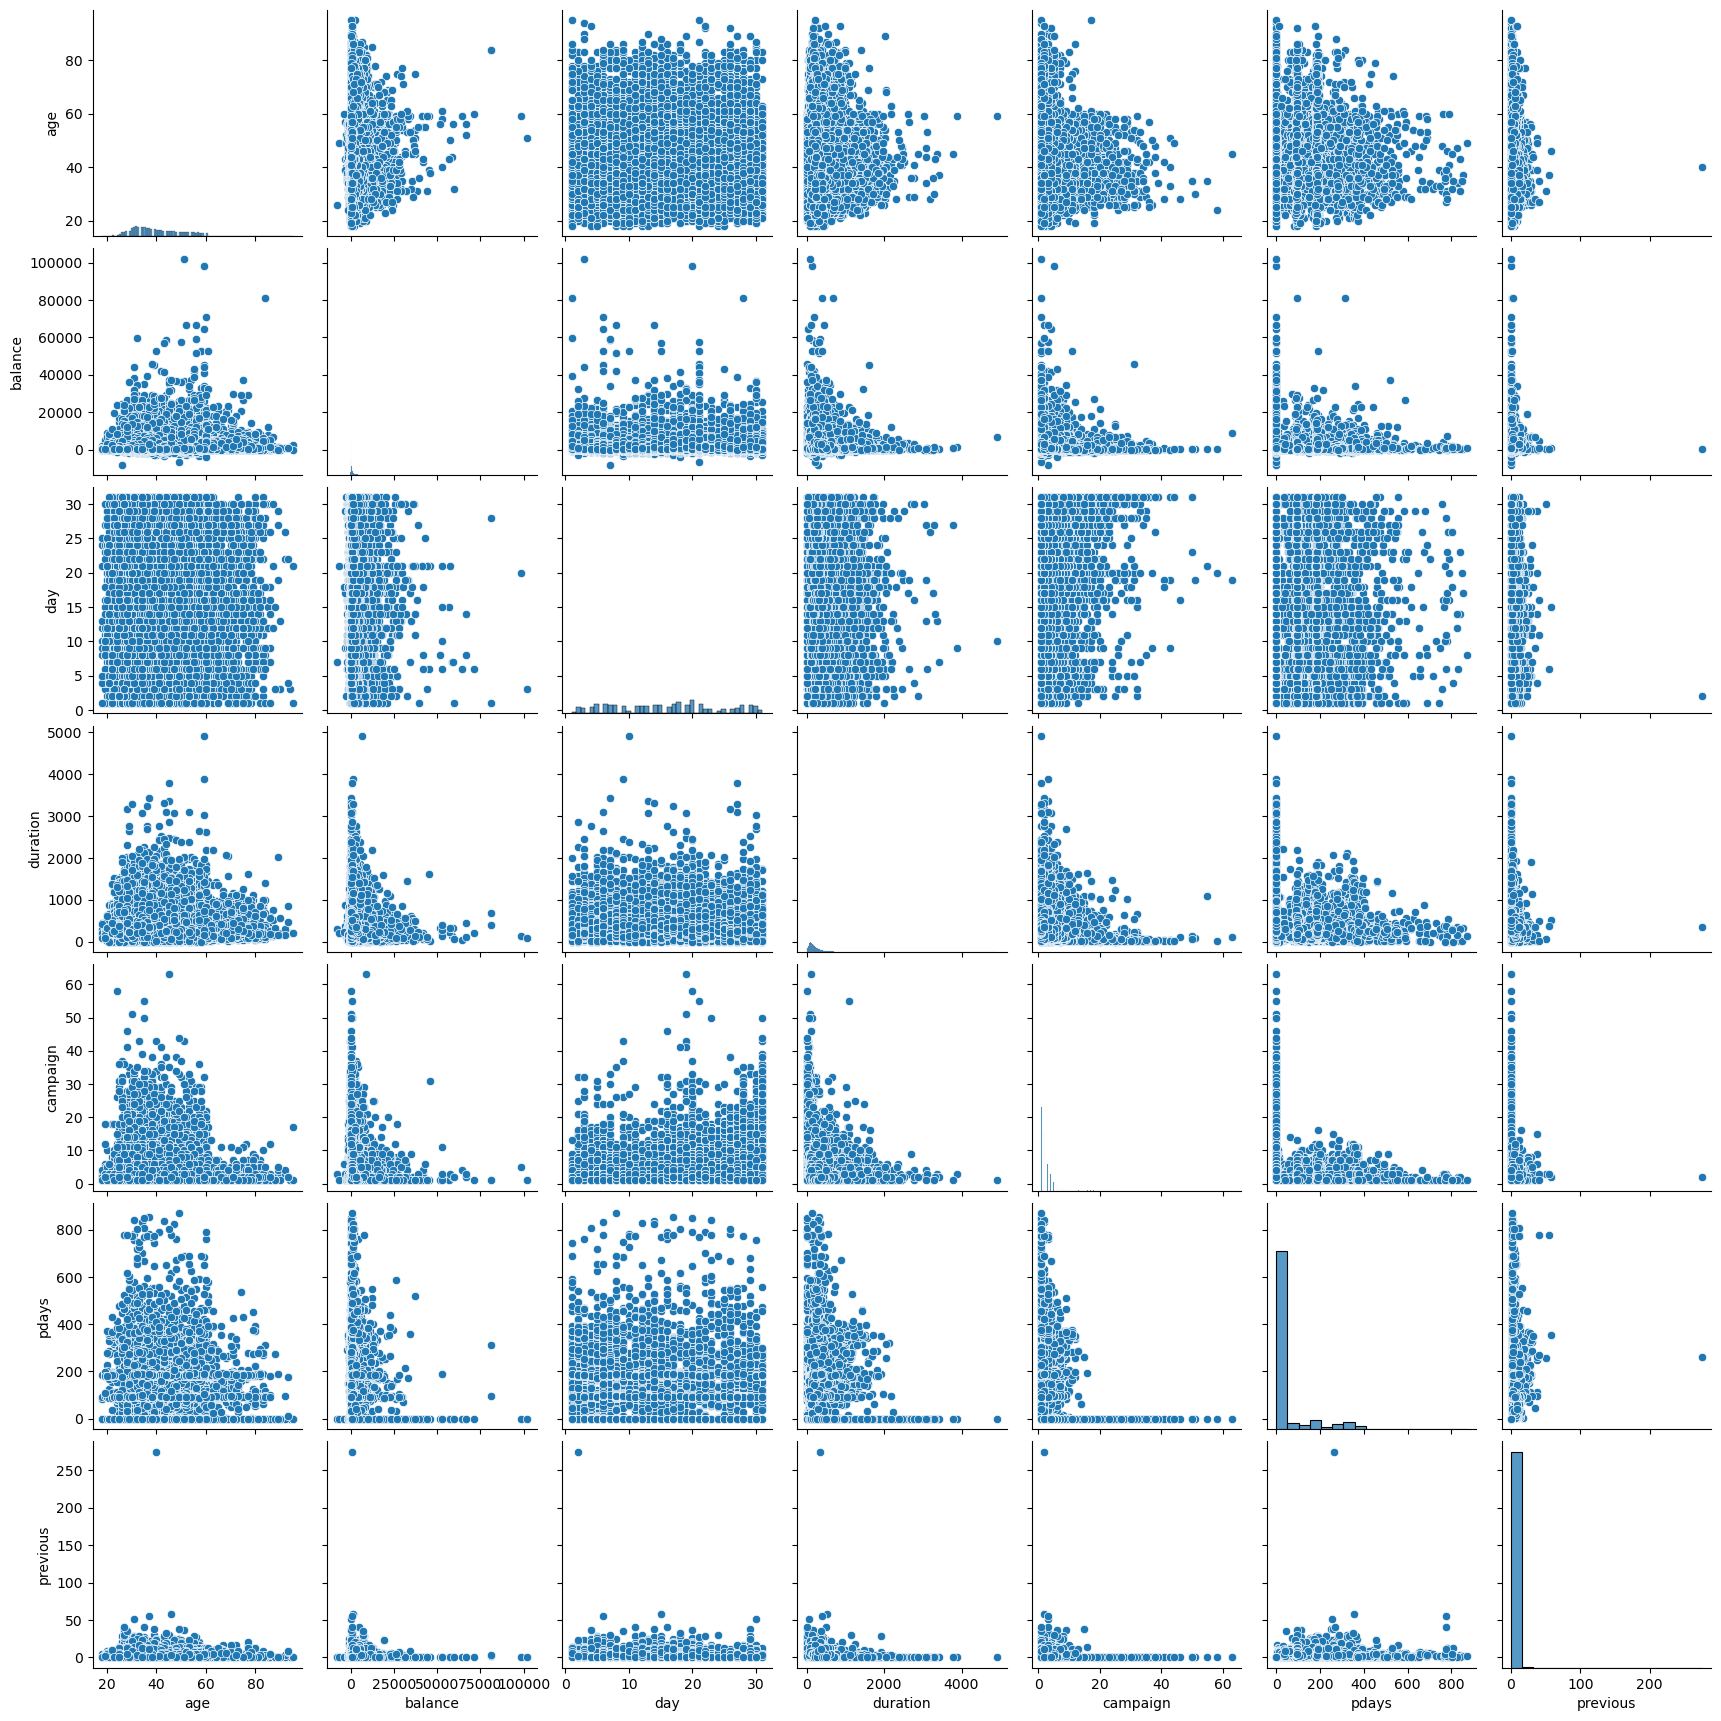

In [115]:
sns.pairplot(df_majeur)

/Users/natachanjongwayepnga/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


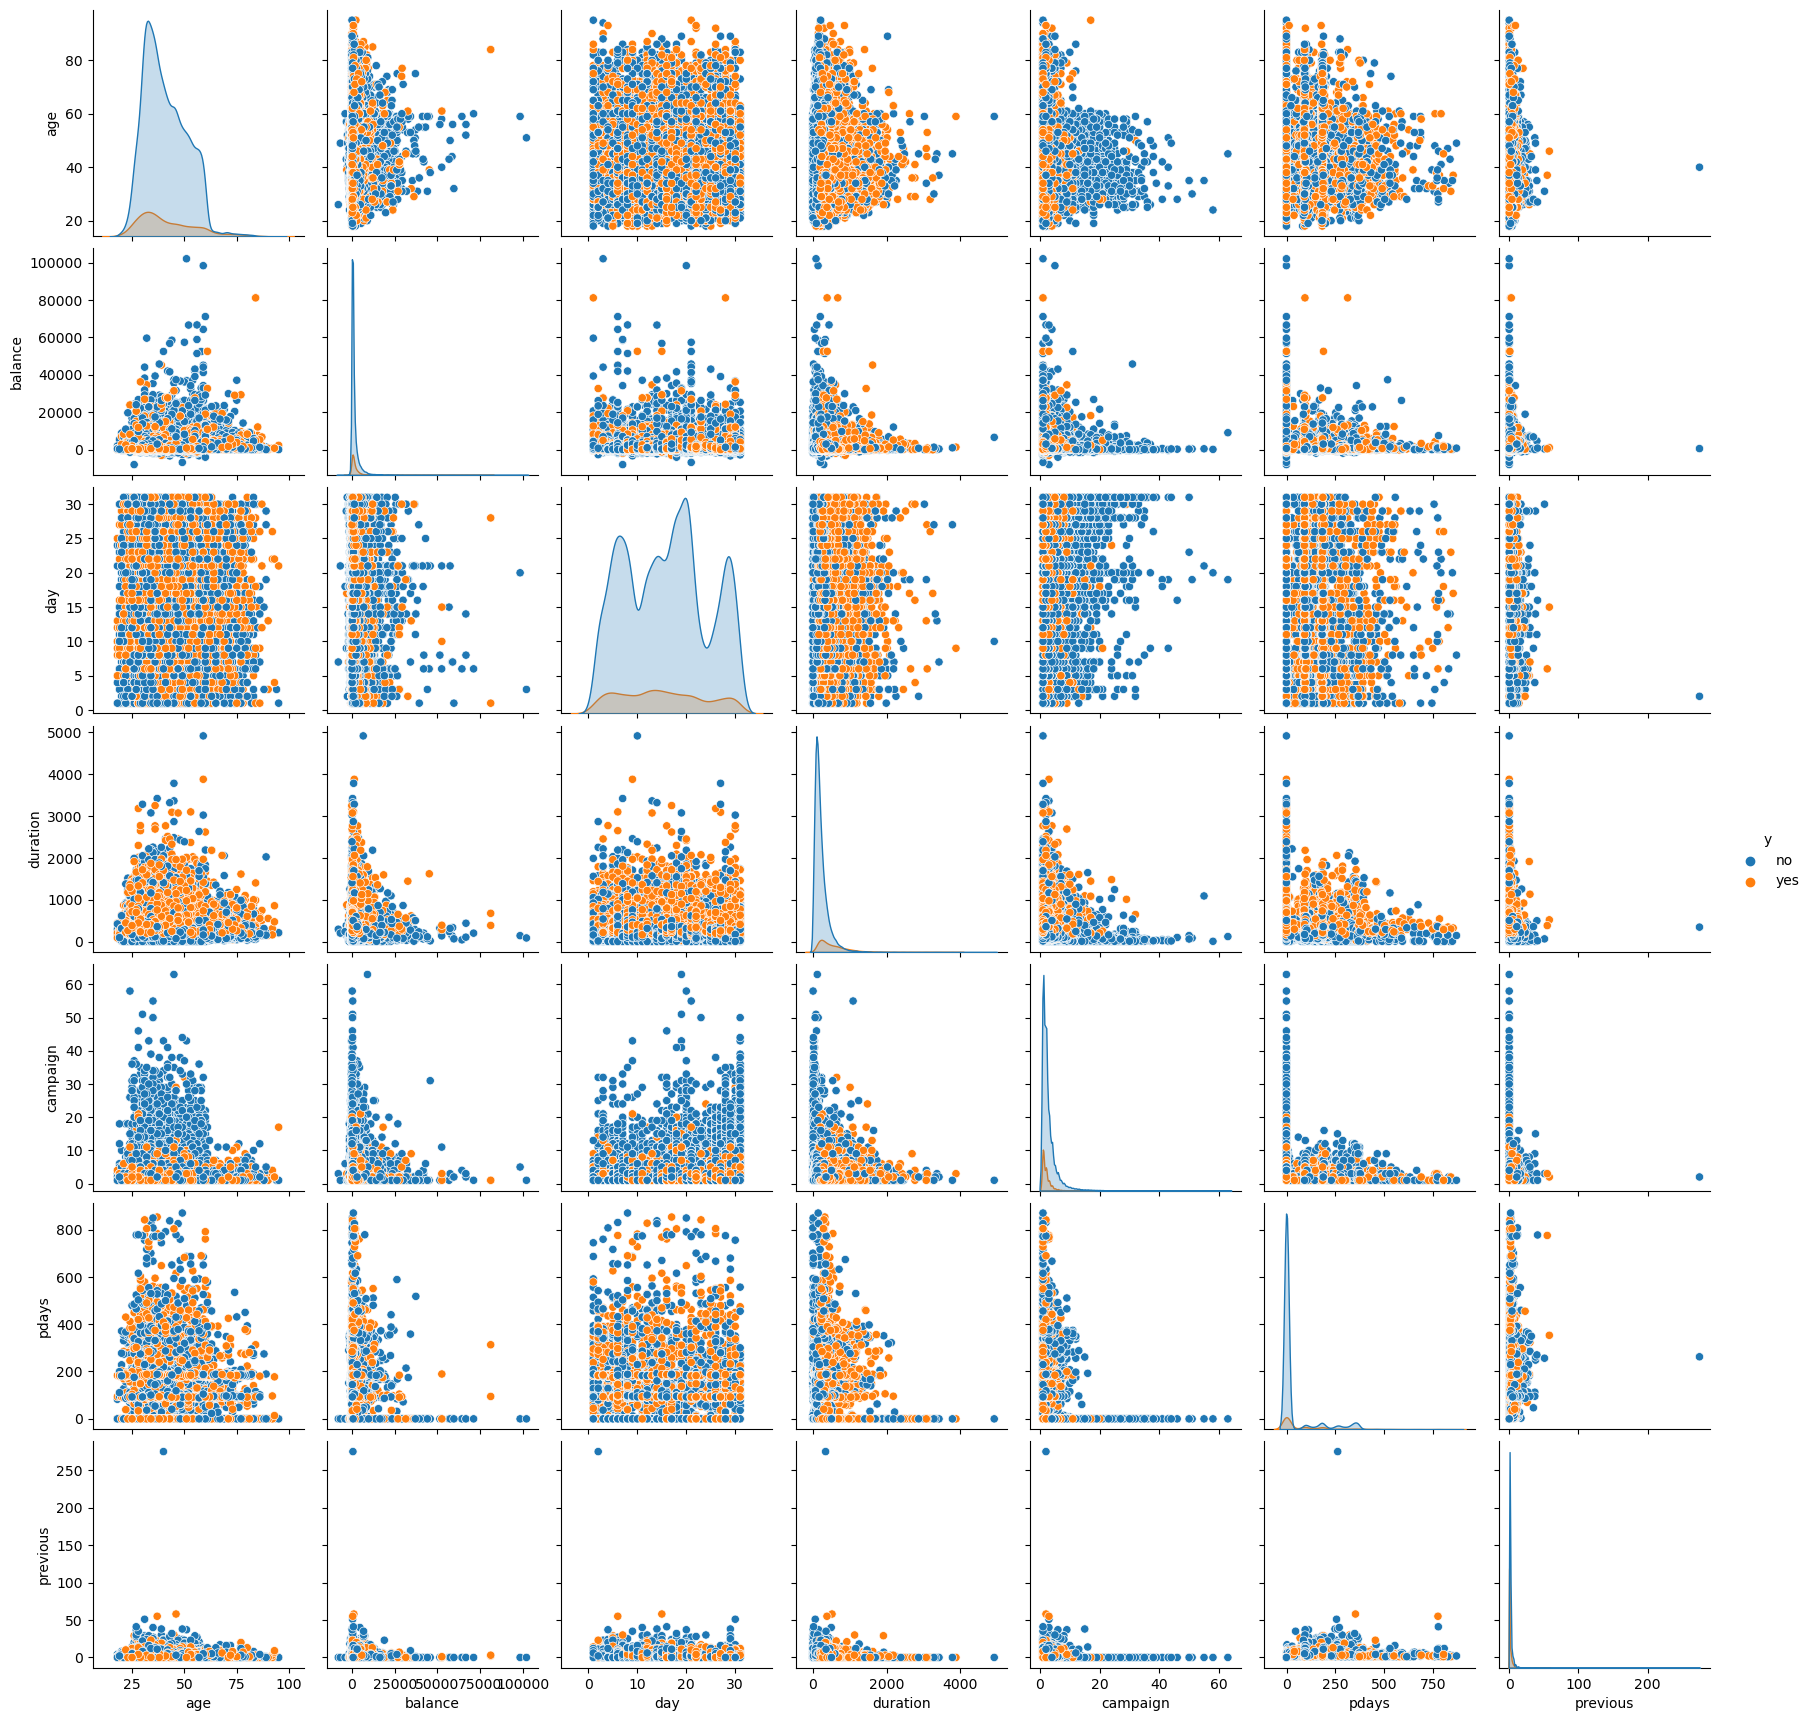

In [117]:
sns.pairplot(df_majeur, hue="y")

# Découvrir plotly

Découvrir plotly en cliquant sur le lien suivant [https://plotly.com/](https://plotly.com/)

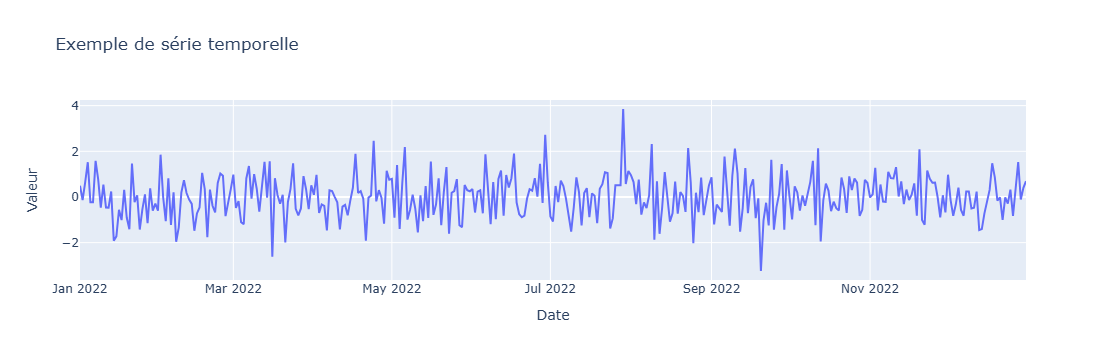

In [119]:
import plotly.express as px
import pandas as pd
import numpy as np

# Créez un dataframe avec des données de série temporelle fictives
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
data = {
    'Date': date_rng,
    'Valeur': np.random.randn(len(date_rng))
}
df = pd.DataFrame(data)

# Créez un graphique de série temporelle avec Plotly Express
fig = px.line(df, x='Date', y='Valeur', title='Exemple de série temporelle')

# Affichez le graphique interactif
fig.show()

## Exercice 1 : Analyse de la Répartition des Métiers des Clients

**Objectif** : Examiner la distribution des différents types de métiers (`job`) parmi les clients.

**Instructions** :
1. Utilisez Matplotlib ou Seaborn pour créer un bar plot montrant le nombre de clients pour chaque type de métier.
2. Comparez cette répartition en fonction de l'état civil (`marital`) ou du niveau d'éducation (`education`) à l'aide de bar plots empilés ou groupés.
3. Discutez des tendances ou des schémas intéressants que vous observez dans la répartition des métiers.

---

## Exercice 2 : Analyse des Relations entre Solde Annuel et Variables Catégorielles

**Objectif** : Comprendre la relation entre le solde annuel (`balance`) et différentes variables catégorielles.

**Instructions** :
1. Créez des boxplots ou des violin plots à l'aide de Seaborn pour montrer la distribution du solde annuel pour différentes catégories de chaque variable catégorielle, telles que `education`, `default`, `housing`, et `loan`.
2. Examinez les tendances observées, comme la manière dont le niveau d'éducation pourrait influencer le solde annuel moyen.
3. Discutez des implications possibles de ces tendances pour la prise de décisions dans le domaine bancaire ou financier.

---

## Exercice 3 : Exploration de l'Impact des Campagnes Marketing

**Objectif** : Analyser l'efficacité des campagnes marketing sur la souscription de dépôts à terme.

**Instructions** :
1. Utilisez un bar plot pour comparer le taux de souscription (`y`) en fonction de différentes variables telles que `poutcome` (résultat de la campagne marketing précédente), `campaign` (nombre de contacts pendant la campagne actuelle), et `previous` (nombre de contacts avant la campagne actuelle).
2. Examinez comment la durée de la dernière communication (`duration`) affecte la probabilité de souscription. Utilisez un scatter plot ou un line plot pour montrer cette relation.
3. Interprétez les résultats pour déterminer quels aspects des campagnes marketing semblent être les plus efficaces pour augmenter les souscriptions.